In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle


In [23]:
fake_covid_clean = fake_covid.loc[~fake_covid["subcategory"].str.contains("partially false")][["title", "text", "subcategory"]]
fake_covid_clean["label"] = np.where(fake_covid_clean["subcategory"].str.contains("false news"), "fake", "true")
fake_covid_clean.head()

,title,text,subcategory,label
0,FACEBOOK DELETES MICHIGAN ANTI-LOCKDOWN GROUP ...,Facebook has shuttered a popular group for Mic...,false news,fake
1,Other Viewpoints: COVID-19 is worse than the flu,We can now officially put to rest all comparis...,true,true
2,Bermuda's COVID-19 cases surpass 100,The Ministry of Health in Bermuda has confirme...,true,true
4,THE HIGH COST OF LOCKING DOWN AMERICA: “WE’VE ...,Locking down much of the country may have help...,false news,fake
5,NY TIMES WORRIES HALF OF AMERICANS WILL REFUSE...,The New York Times has published an article by...,false news,fake


In [24]:
fake_covid_clean["label"].value_counts()

true    2061
fake     659
Name: label, dtype: int64

In [25]:
fake_covid_shuffled = fake_covid_clean.sample(frac=1)[["title", "text", "label"]].reset_index(drop=True)
fake_covid_final = pd.concat([fake_covid_shuffled.loc[fake_covid_shuffled["label"]=="true"].head(659), fake_covid_shuffled.loc[fake_covid_shuffled["label"]=="fake"]]).dropna().reset_index(drop=True)
fake_covid_final.head()

,title,text,label
0,Coronavirus in the UK: Measures and impact of ...,The UK Department of Health has declared the W...,true
1,FG Budgets N620 Million To Prevent Corona Virus,FG Budgets N620 Million To Prevent Corona Viru...,true
2,First corona virus death in Hong Kong,China National Health Commission: # coronaviru...,true
3,F1 China GP 2020 Officially Postponed Due to C...,Home Sports F1 China GP 2020 Officially Postpo...,true
4,Corona in China: those who not wear masques ja...,"In Wuhan in China, the epicenter of the Corona...",true


In [26]:
train_data = fake_covid_final[:1000]
test_data = fake_covid_final[1000:1200]
dev_data = fake_covid_final[1200:]

In [27]:
train_text, train_title, train_labels = train_data['text'], train_data['title'], train_data['label']
test_text, test_title,  test_labels = test_data['text'], test_data['title'], test_data['label']
dev_text, dev_title, dev_labels = dev_data['text'], dev_data['title'], dev_data['label']

In [28]:
cv = CountVectorizer(stop_words=set(stopwords.words('english')))
covid_cv = cv.fit(fake_covid_final['text'])

[0.66, 0.84, 0.735, 0.81, 0.71, 0.815, 0.745, 0.785, 0.77, 0.795, 0.735, 0.775, 0.74, 0.765, 0.765, 0.785, 0.77, 0.79, 0.775]


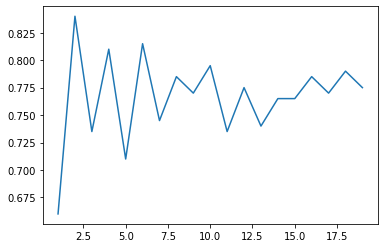

In [29]:
train_text_cv = covid_cv.transform(train_text)
test_text_cv = covid_cv.transform(test_text)

knn_scores = []
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_text_cv, train_labels)
    knn_scores.append(knn.score(test_text_cv, test_labels))

plt.plot(range(1, 20), knn_scores)
print(knn_scores)